# Collect useful functions/operations in fenics

In [ ]:
import sys
import numpy as np
import dolfin as dl

src_path = "../"
sys.path.append(src_path + 'plotting/')
from plotUtilities import quick_field_plot, get_default_plot_mix_collection_data, plot_mix_collection


from fenicsUtilities import *

import matplotlib.pyplot as plt
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# set seed
seed = 0
np.random.seed(seed)

In [6]:
# data_folder = 'fenics_playground_dir/'
# current_directory = os.getcwd()  
# results_dir = current_directory + '/' + data_folder
# if not os.path.exists(results_dir):
#     os.makedirs(results_dir)

# Test using random samples

diff_u_vv_u_vv_fn: 0.0
diff_u_vv_u_vec_to_vv: 0.0
diff_u_vec_u_vec_fn: 0.0
diff_u_vec_u_vv_to_vec: 0.0


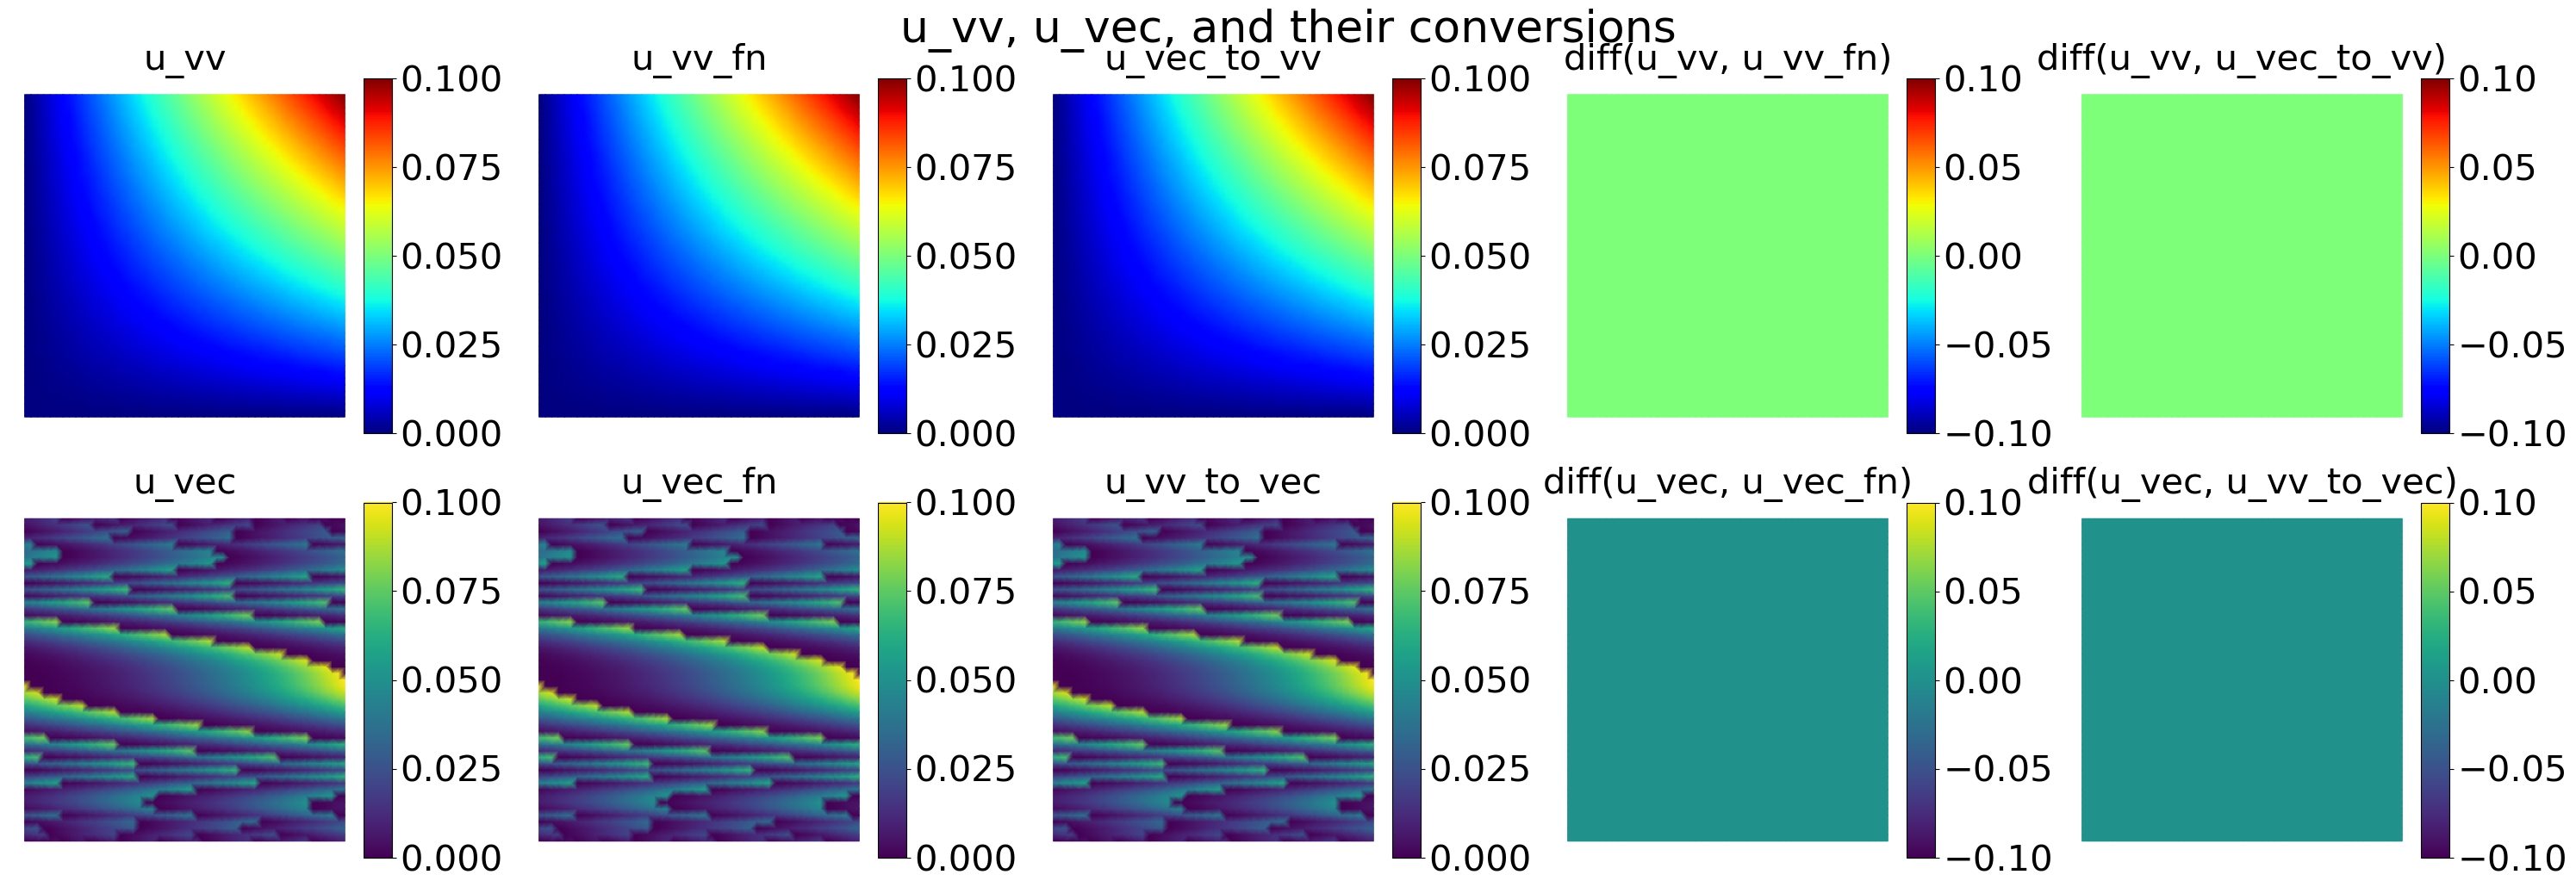

In [ ]:
# create mesh
mesh = dl.UnitSquareMesh(50, 50)
V = dl.FunctionSpace(mesh, "Lagrange", 1)

# test functions
u = dl.Function(V)
u_assign = np.random.rand(V.dim())
nodes = mesh.coordinates()
num_nodes = nodes.shape[0]
for i in range(num_nodes):
    u_assign[i] = 0.1 * np.linalg.norm(nodes[i])

u.vector().set_local(vertex_to_vector(u_assign, None, V))
u2 = dl.Function(V)

uu = dl.Function(V)
uu.interpolate(dl.Expression(("0.1*x[0]*x[1]"), degree=2))

u.vector().set_local(uu.vector().get_local())

u_vv = function_to_vertex(u, None, V=V)
u_vec = function_to_vector(u)

u_vv_fn = vertex_to_function(u_vv, V=V)
u_vec_fn = vector_to_function(u_vec, u2)

u_vv_to_vec = vertex_to_vector(u_vv, V=V)
u_vec_to_vv = vector_to_vertex(u_vec, V=V)

# 
# diff_u_vv_u_vv_fn = u_vv - u_vv_fn.compute_vertex_values() # works for scalar functions but not for vector functions
diff_u_vv_u_vv_fn = u_vv - function_to_vertex(u_vv_fn, None, V)
diff_u_vv_u_vec_to_vv = u_vv - u_vec_to_vv

print('diff_u_vv_u_vv_fn:', np.linalg.norm(diff_u_vv_u_vv_fn))
print('diff_u_vv_u_vec_to_vv:', np.linalg.norm(diff_u_vv_u_vec_to_vv))

diff_u_vec_u_vec_fn = u_vec - u_vec_fn.vector().get_local()
diff_u_vec_u_vv_to_vec = u_vec - u_vv_to_vec

print('diff_u_vec_u_vec_fn:', np.linalg.norm(diff_u_vec_u_vec_fn))
print('diff_u_vec_u_vv_to_vec:', np.linalg.norm(diff_u_vec_u_vv_to_vec))

# create data for plot
data = get_default_plot_mix_collection_data()
data['figsize'] = (30, 10)
data['fs'] = 30
data['rows'] = 2
data['cols'] = 5
data['nodes'] = mesh.coordinates()
data['sup_title'] = 'u_vv, u_vec, and their conversions'

uvec = [[u_vv, function_to_vertex(u_vv_fn, None, V), u_vec_to_vv, diff_u_vv_u_vv_fn, diff_u_vv_u_vec_to_vv], \
        [u_vec, function_to_vector(u_vec_fn), u_vv_to_vec, diff_u_vec_u_vec_fn, diff_u_vec_u_vv_to_vec]]

title_vec = np.array([['u_vv', 'u_vv_fn', 'u_vec_to_vv', \
                       'diff(u_vv, u_vv_fn)', 'diff(u_vv, u_vec_to_vv)'], \
                      ['u_vec', 'u_vec_fn', 'u_vv_to_vec', \
                       'diff(u_vec, u_vec_fn)', 'diff(u_vec, u_vv_to_vec)']])

data['u']= uvec
data['title'] = title_vec
data['cmap'] = np.array([['jet' for _ in range(5)], ['viridis' for _ in range(5)]])
data['axis_off'] = [[True for _ in range(5)], [True for _ in range(5)]]
data['is_vec'] = [[False for _ in range(5)], [False for _ in range(5)]]
data['add_disp'] = [[False for _ in range(5)], [False for _ in range(5)]]



plot_mix_collection(data)


u_cvv - u_vv = 0.0
u_cvv - u_vec = 1.5566373131850593
u_vv - u_vec_to_vv = 0.0
u_vec - u_vv_to_vec = 0.0


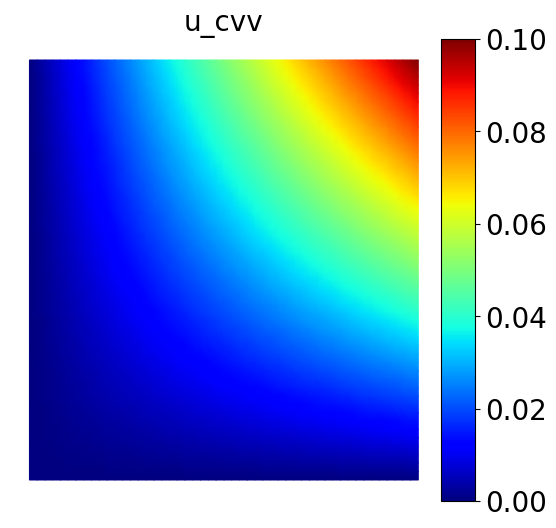

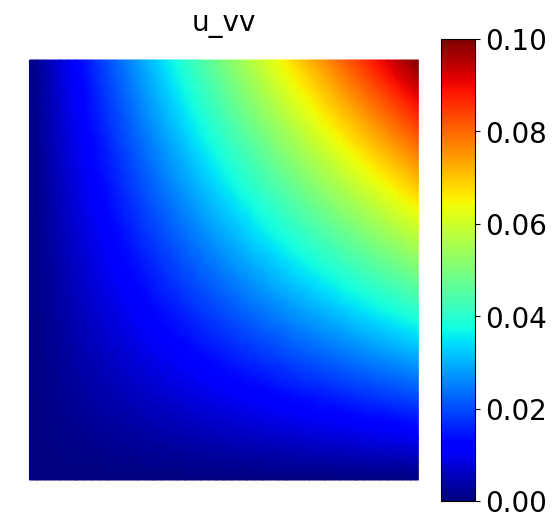

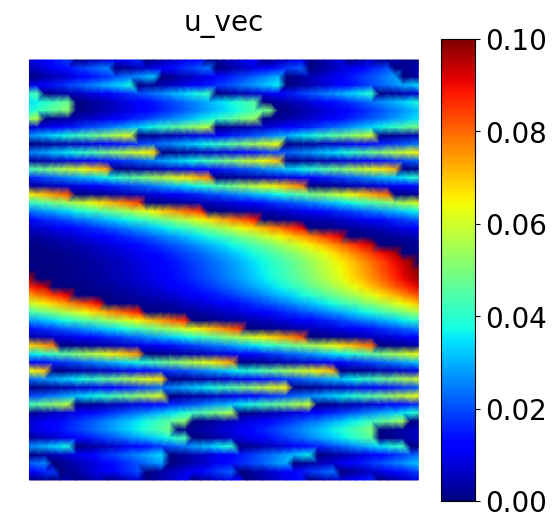

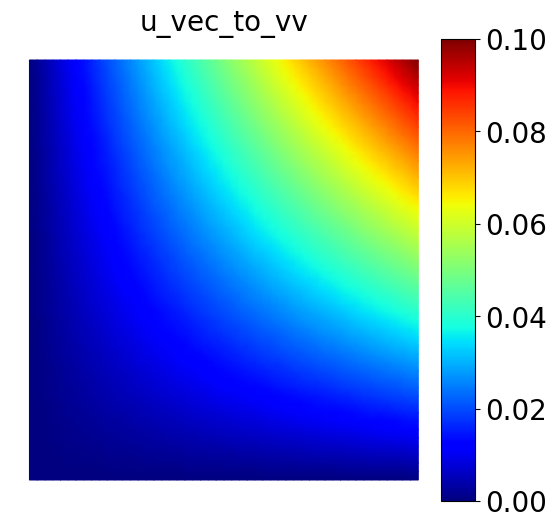

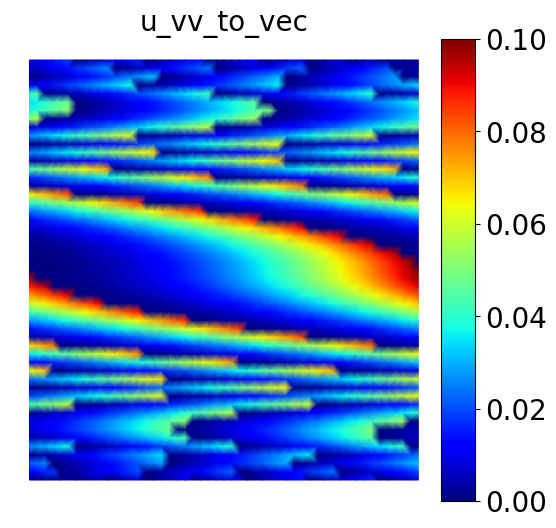

In [61]:
u.vector().set_local(uu.vector().get_local())

u_cvv = u.compute_vertex_values().copy()
u_vv = function_to_vertex(u, None, V).copy()
# u_vv = u.vector().get_local().copy()[Vd2v]
# u_vv = u_cvv[Vv2d].copy()

u_vec = function_to_vector(u).copy()
u_vec_to_vv = vector_to_vertex(u_vec, V=V).copy()
u_vv_to_vec = vertex_to_vector(u_vv, V=V).copy()

print('u_cvv - u_vv =', np.linalg.norm(u_cvv - u_vv))
print('u_cvv - u_vec =', np.linalg.norm(u_cvv - u_vec))
print('u_vv - u_vec_to_vv =', np.linalg.norm(u_vv - u_vec_to_vv))
print('u_vec - u_vv_to_vec =', np.linalg.norm(u_vec - u_vv_to_vec))

quick_field_plot(u_cvv, V.mesh().coordinates(), title = 'u_cvv')
quick_field_plot(u_vv, V.mesh().coordinates(), title = 'u_vv')
quick_field_plot(u_vec, V.mesh().coordinates(), title = 'u_vec')
quick_field_plot(u_vec_to_vv, V.mesh().coordinates(), title = 'u_vec_to_vv')
quick_field_plot(u_vv_to_vec, V.mesh().coordinates(), title = 'u_vv_to_vec')

In [63]:
nodes = mesh.coordinates()
num_nodes = mesh.coordinates().shape[0]

for i in range(num_nodes):
    if i%50 == 0:
        x, y = nodes[i][0], nodes[i][1]
        uxy = 0.1*x*y
        print('i = {}, x = {:.2e}, y = {:.2e}, uxy = {:.2e}'.format(i, x, y, uxy))
        print('u_cvv[i] = {:.2e}, u_vv[i] = {:.2e}, u_vec[i] = {:.2e}\n'.format(u_cvv[i], u_vv[i], u_vec[i]))

i = 0, x = 0.00e+00, y = 0.00e+00, uxy = 0.00e+00
u_cvv[i] = 0.00e+00, u_vv[i] = 0.00e+00, u_vec[i] = 0.00e+00

i = 50, x = 1.00e+00, y = 0.00e+00, uxy = 0.00e+00
u_cvv[i] = 0.00e+00, u_vv[i] = 0.00e+00, u_vec[i] = 9.20e-03

i = 100, x = 9.80e-01, y = 2.00e-02, uxy = 1.96e-03
u_cvv[i] = 1.96e-03, u_vv[i] = 1.96e-03, u_vec[i] = 1.66e-02

i = 150, x = 9.60e-01, y = 4.00e-02, uxy = 3.84e-03
u_cvv[i] = 3.84e-03, u_vv[i] = 3.84e-03, u_vec[i] = 2.69e-02

i = 200, x = 9.40e-01, y = 6.00e-02, uxy = 5.64e-03
u_cvv[i] = 5.64e-03, u_vv[i] = 5.64e-03, u_vec[i] = 1.64e-02

i = 250, x = 9.20e-01, y = 8.00e-02, uxy = 7.36e-03
u_cvv[i] = 7.36e-03, u_vv[i] = 7.36e-03, u_vec[i] = 3.65e-02

i = 300, x = 9.00e-01, y = 1.00e-01, uxy = 9.00e-03
u_cvv[i] = 9.00e-03, u_vv[i] = 9.00e-03, u_vec[i] = 0.00e+00

i = 350, x = 8.80e-01, y = 1.20e-01, uxy = 1.06e-02
u_cvv[i] = 1.06e-02, u_vv[i] = 1.06e-02, u_vec[i] = 5.00e-02

i = 400, x = 8.60e-01, y = 1.40e-01, uxy = 1.20e-02
u_cvv[i] = 1.20e-02, u_vv[i] = 1.20e-02

# Vector functions

diff_u_vv_u_vv_fn: 0.0
diff_u_vv_u_vec_to_vv: 0.0
diff_u_vec_u_vec_fn: 0.0
diff_u_vec_u_vv_to_vec: 0.0


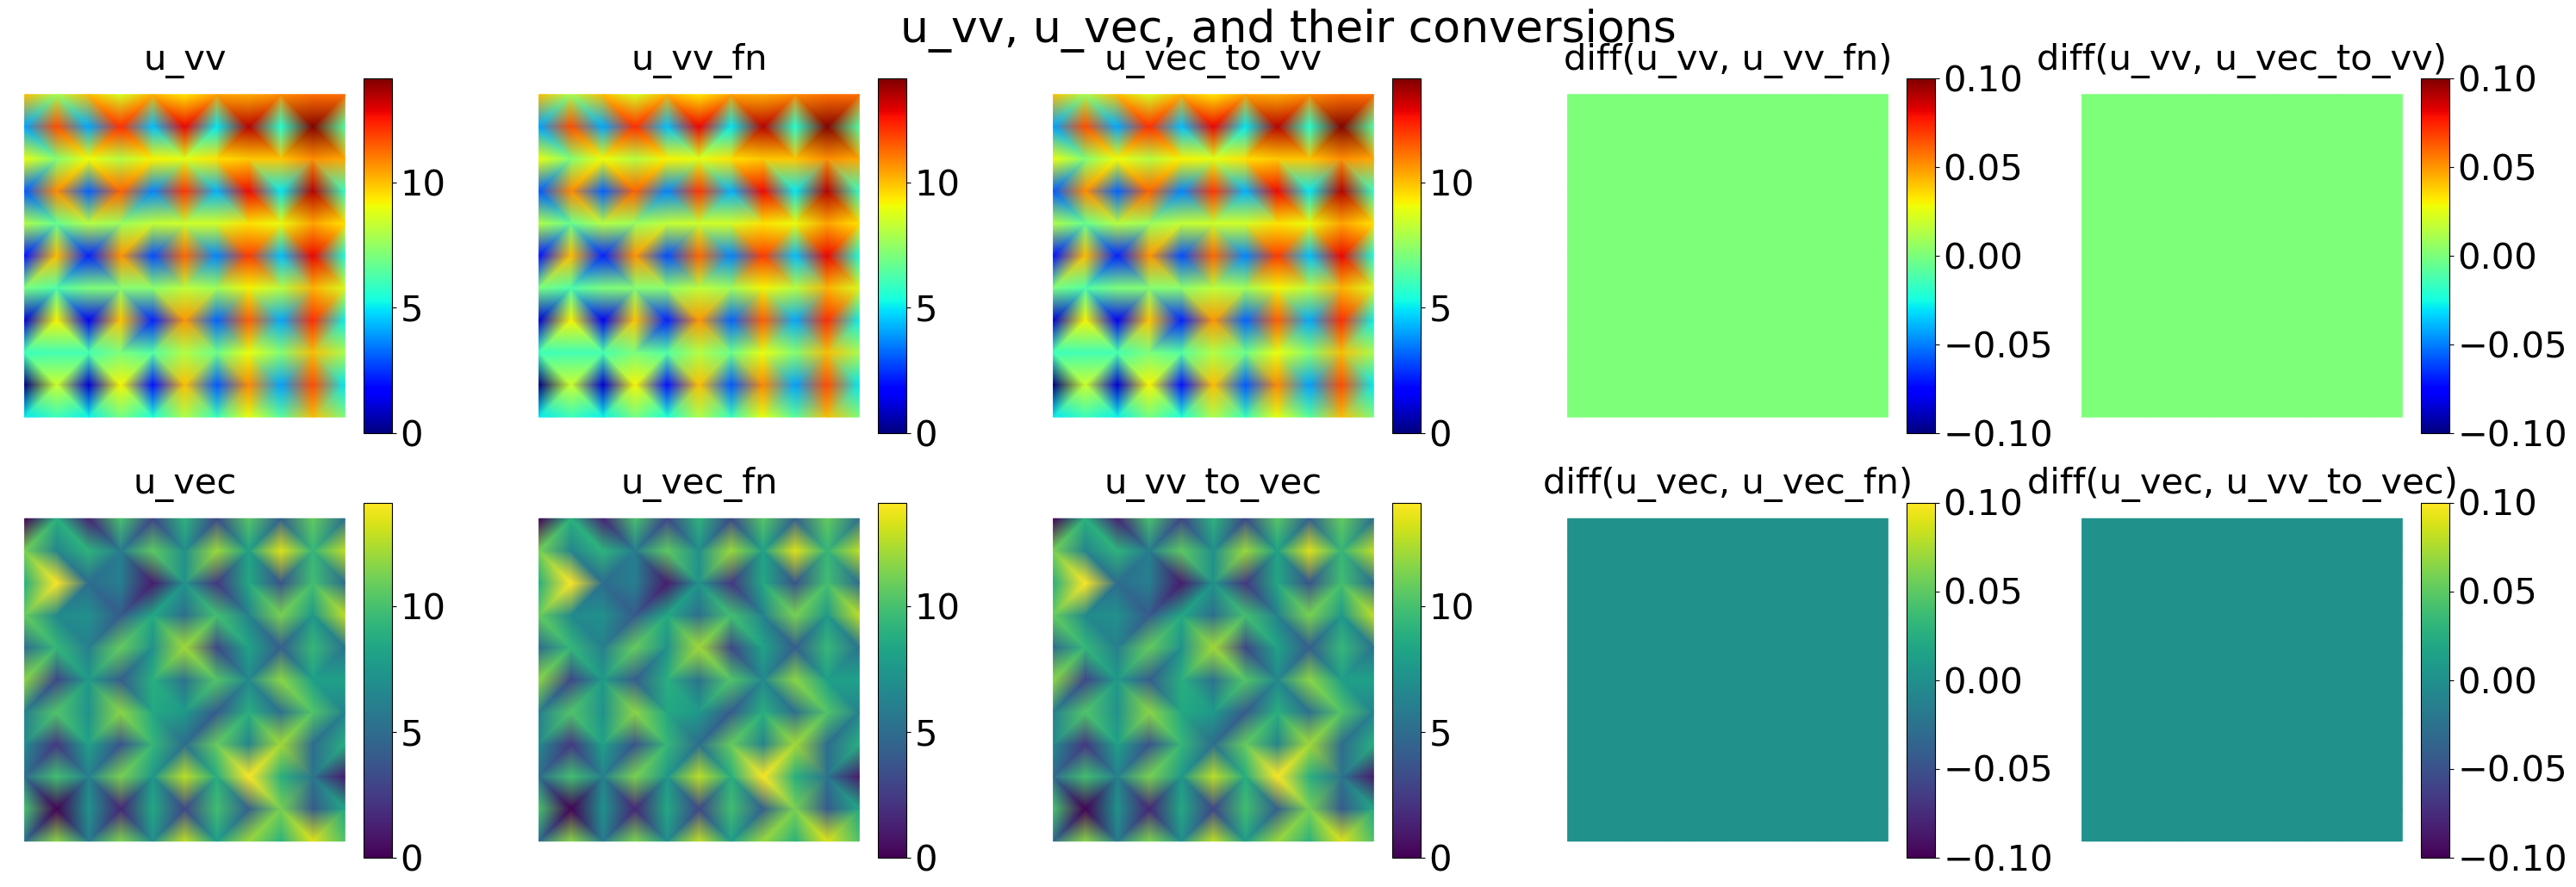

In [49]:
# create mesh
mesh = dl.UnitSquareMesh(10, 10)
V = dl.VectorFunctionSpace(mesh, "Lagrange", 1)

Vd2v = dl.dof_to_vertex_map(V)
Vv2d = dl.vertex_to_dof_map(V)

# test functions
u = dl.Function(V)
u_assign = np.random.rand(V.dim())
nodes = mesh.coordinates()
num_nodes = nodes.shape[0]
for i in range(num_nodes):
    u_assign[i] = 0.1 * np.linalg.norm(nodes[i])
    u_assign[num_nodes + i] = 0.2 * np.linalg.norm(nodes[i])

u.vector().set_local(vertex_to_vector(u_assign, None, V))

uu = dl.Function(V)
uu.interpolate(dl.Expression(("10*x[0]", "10*x[1]"), degree=2))

u.vector().set_local(uu.vector().get_local())


u2 = dl.Function(V)

u_vv = function_to_vertex(u, None, V=V)
u_vec = function_to_vector(u)

u_vv_fn = vertex_to_function(u_vv, V=V)
u_vec_fn = vector_to_function(u_vec, u2)

u_vv_to_vec = vertex_to_vector(u_vv, V=V)
u_vec_to_vv = vector_to_vertex(u_vec, V=V)

#
# diff_u_vv_u_vv_fn = u_vv - u_vv_fn.compute_vertex_values() # produces error
diff_u_vv_u_vv_fn = u_vv - function_to_vertex(u_vv_fn, None, V)
diff_u_vv_u_vec_to_vv = u_vv - u_vec_to_vv

print('diff_u_vv_u_vv_fn:', np.linalg.norm(diff_u_vv_u_vv_fn))
print('diff_u_vv_u_vec_to_vv:', np.linalg.norm(diff_u_vv_u_vec_to_vv))

diff_u_vec_u_vec_fn = u_vec - u_vec_fn.vector().get_local()
diff_u_vec_u_vv_to_vec = u_vec - u_vv_to_vec

print('diff_u_vec_u_vec_fn:', np.linalg.norm(diff_u_vec_u_vec_fn))
print('diff_u_vec_u_vv_to_vec:', np.linalg.norm(diff_u_vec_u_vv_to_vec))

# create data for plot
data = get_default_plot_mix_collection_data()
data['figsize'] = (30, 10)
data['fs'] = 30
data['rows'] = 2
data['cols'] = 5
data['nodes'] = mesh.coordinates()
data['sup_title'] = 'u_vv, u_vec, and their conversions'

uvec = [[u_vv, function_to_vertex(u_vv_fn, None, V), u_vec_to_vv, diff_u_vv_u_vv_fn, diff_u_vv_u_vec_to_vv], \
        [u_vec, function_to_vector(u_vec_fn), u_vv_to_vec, diff_u_vec_u_vec_fn, diff_u_vec_u_vv_to_vec]]

title_vec = np.array([['u_vv', 'u_vv_fn', 'u_vec_to_vv', \
                       'diff(u_vv, u_vv_fn)', 'diff(u_vv, u_vec_to_vv)'], \
                      ['u_vec', 'u_vec_fn', 'u_vv_to_vec', \
                       'diff(u_vec, u_vec_fn)', 'diff(u_vec, u_vv_to_vec)']])

data['u']= uvec
data['title'] = title_vec
data['cmap'] = np.array([['jet' for _ in range(5)], ['viridis' for _ in range(5)]])
data['axis_off'] = [[True for _ in range(5)], [True for _ in range(5)]]
data['is_vec'] = [[True for _ in range(5)], [True for _ in range(5)]]
data['add_disp'] = [[False for _ in range(5)], [False for _ in range(5)]]



plot_mix_collection(data)


u_cvv - u_vv = 60.0
u_cvv - u_vec = 68.92024376045111
u_vv - u_vec_to_vv = 0.0
u_vec - u_vv_to_vec = 0.0


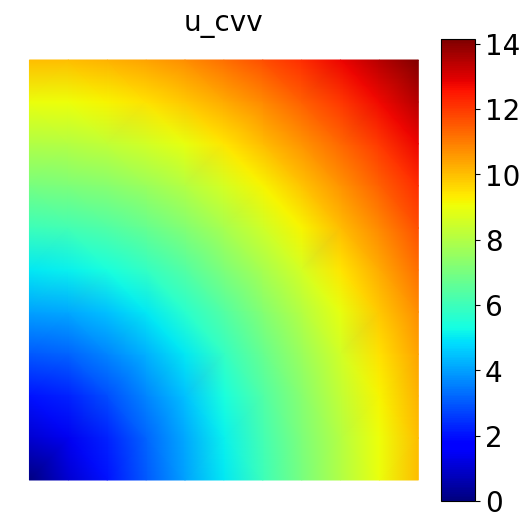

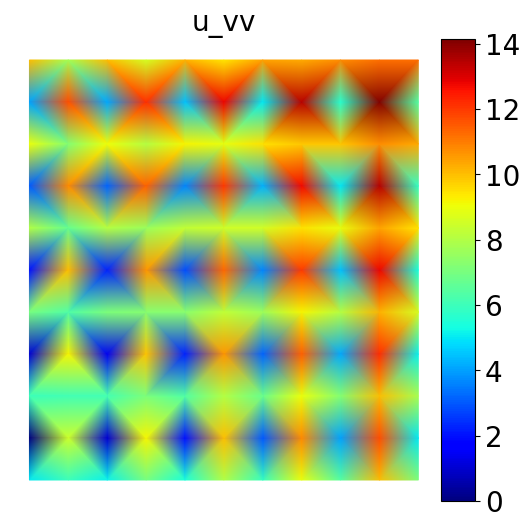

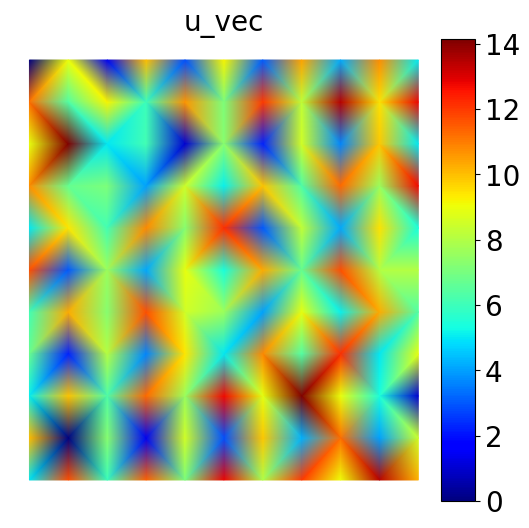

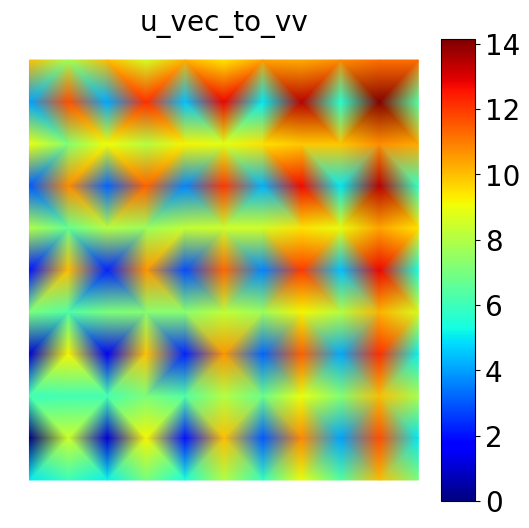

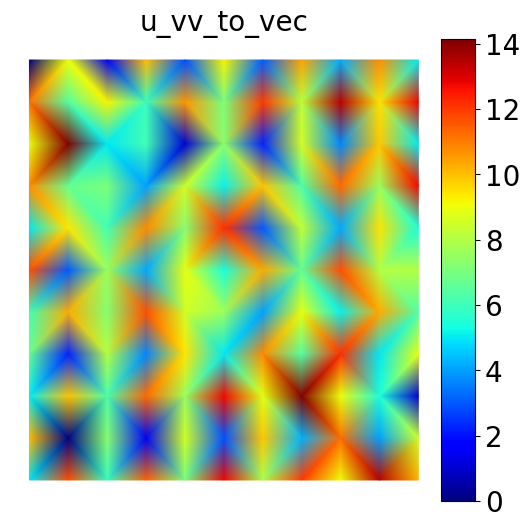

In [50]:
u.vector().set_local(uu.vector().get_local())
ux, uy = dl.split(u)

u_cvv = u.compute_vertex_values().copy()
u_vv = function_to_vertex(u, None, V).copy()
# u_vv = u.vector().get_local().copy()[Vd2v]
# u_vv = u_cvv[Vv2d].copy()

u_vec = function_to_vector(u).copy()
u_vec_to_vv = vector_to_vertex(u_vec, V=V).copy()
u_vv_to_vec = vertex_to_vector(u_vv, V=V).copy()

print('u_cvv - u_vv =', np.linalg.norm(u_cvv - u_vv))
print('u_cvv - u_vec =', np.linalg.norm(u_cvv - u_vec))
print('u_vv - u_vec_to_vv =', np.linalg.norm(u_vv - u_vec_to_vv))
print('u_vec - u_vv_to_vec =', np.linalg.norm(u_vec - u_vv_to_vec))

quick_field_plot(u_cvv, V.mesh().coordinates(), title = 'u_cvv', is_displacement=True)
quick_field_plot(u_vv, V.mesh().coordinates(), title = 'u_vv', is_displacement=True)
quick_field_plot(u_vec, V.mesh().coordinates(), title = 'u_vec', is_displacement=True)
quick_field_plot(u_vec_to_vv, V.mesh().coordinates(), title = 'u_vec_to_vv', is_displacement=True)
quick_field_plot(u_vv_to_vec, V.mesh().coordinates(), title = 'u_vv_to_vec', is_displacement=True)

In [51]:
u_cvv.shape, u_vv.shape, u_vec.shape, u_vec_to_vv.shape, u_vv_to_vec.shape

((242,), (242,), (242,), (242,), (242,))

In [57]:
nodes = mesh.coordinates()
num_nodes = mesh.coordinates().shape[0]
my_vec_to_vv_map = np.zeros(num_nodes, dtype=int)
my_vv_to_vec_map = np.zeros(num_nodes, dtype=int)

for i in range(num_nodes):
    if i%10 == 0:
        x, y = nodes[i][0], nodes[i][1]
        ux, uy = 10*x, 10*y
        print('i = {}, x = {:.2e}, y = {:.2e}, ux = {:.2e}, uy = {:.2e}'.format(i, x, y, ux, uy))
        u_cvvx, u_cvv_y = u_cvv[i], u_cvv[num_nodes + i]
        u_vvx, u_vv_y = u_vv[i], u_vv[num_nodes + i]
        u_vecx, u_vec_y = u_vec[i], u_vec[num_nodes + i]
        print('u_cvvx = {:.2e}, u_cvv_y = {:.2e}, u_vvx = {:.2e}, u_vv_y = {:.2e}, u_vecx = {:.2e}, u_vec_y = {:.2e}\n'.format(u_cvvx, u_cvv_y, u_vvx, u_vv_y, u_vecx, u_vec_y))

for i in range(num_nodes):
    u_vecx, u_vec_y = u_vec[i], u_vec[num_nodes + i]
    u_vecx = int(np.round(u_vecx))
    u_vec_y = int(np.round(u_vec_y))

    u_vvx, u_vv_y = u_vv[i], u_vv[num_nodes + i]
    u_vvx = int(np.round(u_vvx))
    u_vv_y = int(np.round(u_vv_y))

    print('i = {}, u_vecx = {:d}, u_vec_y = {:d}'.format(i, u_vecx, u_vec_y))   

    print('i = {}, u_vvx = {:d}, u_vv_y = {:d}'.format(i, u_vvx, u_vv_y))


i = 0, x = 0.00e+00, y = 0.00e+00, ux = 0.00e+00, uy = 0.00e+00
u_cvvx = 0.00e+00, u_cvv_y = 0.00e+00, u_vvx = 0.00e+00, u_vv_y = 5.00e+00, u_vecx = 0.00e+00, u_vec_y = 5.00e+00

i = 10, x = 1.00e+00, y = 0.00e+00, ux = 1.00e+01, uy = 0.00e+00
u_cvvx = 1.00e+01, u_cvv_y = 0.00e+00, u_vvx = 5.00e+00, u_vv_y = 5.00e+00, u_vecx = 2.00e+00, u_vec_y = 1.00e+01

i = 20, x = 9.00e-01, y = 1.00e-01, ux = 9.00e+00, uy = 1.00e+00
u_cvvx = 9.00e+00, u_cvv_y = 1.00e+00, u_vvx = 1.00e+01, u_vv_y = 6.00e+00, u_vecx = 0.00e+00, u_vec_y = 4.00e+00

i = 30, x = 8.00e-01, y = 2.00e-01, ux = 8.00e+00, uy = 2.00e+00
u_cvvx = 8.00e+00, u_cvv_y = 2.00e+00, u_vvx = 4.00e+00, u_vv_y = 6.00e+00, u_vecx = 0.00e+00, u_vec_y = 9.00e+00

i = 40, x = 7.00e-01, y = 3.00e-01, ux = 7.00e+00, uy = 3.00e+00
u_cvvx = 7.00e+00, u_cvv_y = 3.00e+00, u_vvx = 9.00e+00, u_vv_y = 7.00e+00, u_vecx = 5.00e+00, u_vec_y = 4.00e+00

i = 50, x = 6.00e-01, y = 4.00e-01, ux = 6.00e+00, uy = 4.00e+00
u_cvvx = 6.00e+00, u_cvv_y = 4.00e+0

In [35]:
Vd2v[0]

5100